In [1]:
%pip install -r modules/requirements_ph.txt
from modules.ph import *

In [6]:
r_in_cm = [5, 6, 9, 12, 14, 18, 22]
F_in_mN = [2.44, 1.9, 0.85, 0.35, 0.2, 0.14, 0.04]

data = {'r': r_in_cm, 'F': F_in_mN}
df_data = pd.DataFrame(data)

In [37]:
def model(p, x):
    a,b,c = p
    return a*1/(x-b)**2+c
startwerte=[120,0,0]

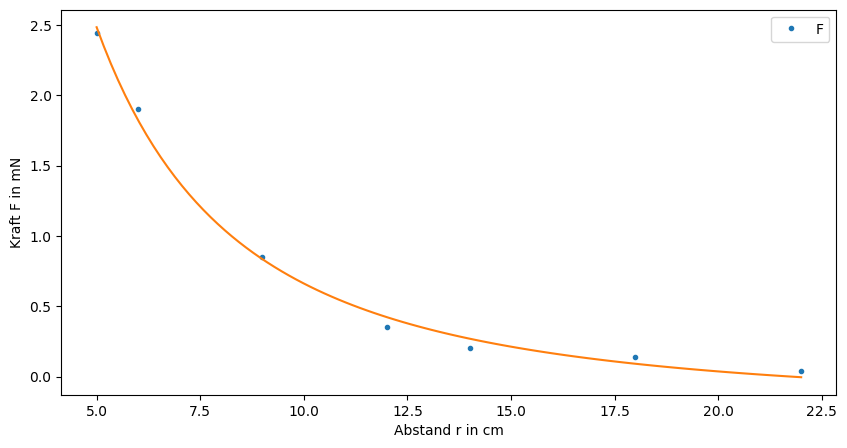

In [38]:
x_key = 'r'
y_key = 'F'

fig,ax = plt.subplots(figsize=(10,5))
df_data.plot(ax=ax,x=x_key,y=y_key, xlabel=f'Abstand r in cm', ylabel=f'Kraft F in mN',style='.')

X = df_data[x_key]
Y = df_data[y_key]
up , p, yfit, out = uODR(model,startwerte,X,Y,sy=10)
X_fit = np.linspace(X.values[0],X.values[-1],100)
Y_fit = model(p, X_fit)
ax.plot(X_fit,Y_fit)
#fig.savefig('plot.jpg',dpi=600)

In [39]:
results = {
            'a' : up[0] *ureg('N*cm**2'),
            'b' : up[1] *ureg('cm'),
            'c' : up[2] *ureg('N'),
          }
for idx,el in results.items():
    print(f"{idx}={el}")

a=119+/-34 N·cm²
b=-1.6+/-0.9 cm
c=-0.22+/-0.09 N
